# Four-Bar Linkage Modeling and Simulation using Python

This notebook demonstrates the complete workflow of:
- Mathematical modeling of a mechanical system
- Solving nonlinear kinematic equations
- Numerical simulation and visualization

The project emphasizes problem formulation and numerical reasoning,
which are foundational skills for applied AI and engineering.


# Four-Bar Linkage Kinematic Modeling

## Problem Description
This notebook models the planar kinematics of a four-bar linkage mechanism.
Given the link lengths and the input crank angle, the goal is to compute the
configuration of the remaining links using geometric constraints.

This problem originates from classical mechanism theory (Olympiad-level)
and is solved here using numerical methods in Python.


## **Coordinate System** and **Link Definition**

A fixed Cartesian coordinate system is defined as follows:
- The origin O is located at the left ground pivot.
- The x-axis is horizontal and points to the right.
- The y-axis is vertical and points upward.

Link definitions:
- Link 1 (ground): fixed, length l1, lies along the x-axis.
- Link 2 (input crank): length l2, rotates with angle θ2 from the x-axis.
- Link 3 (coupler): length l3, connects the end of link 2 to link 4.
- Link 4 (output rocker): length l4, connects the right ground pivot to link 3.

All angles are measured counterclockwise from the positive x-axis.


In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt


In [2]:
# Link lengths (example values)
l1 = 4.0   # ground link
l2 = 1.5   # input crank
l3 = 3.0   # coupler
l4 = 2.5   # output rocker


In [3]:
# Input angle (in radians)
theta2 = np.deg2rad(45)


## Mathematical Modeling

The four-bar linkage is modeled using the vector loop-closure equation.

By separating real and imaginary parts, the problem is transformed
into a system of two nonlinear equations with two unknowns.


In [4]:
def loop_eq(vars, l1, l2, l3, l4, theta2):
    """
    Geometric loop-closure equations for a four-bar linkage.

    vars   : unknown angles [theta3, theta4]
    l1-l4  : link lengths
    theta2: input angle
    """
    theta3, theta4 = vars

    eq1 = l2*np.cos(theta2) + l3*np.cos(theta3) - l4*np.cos(theta4) - l1
    eq2 = l2*np.sin(theta2) + l3*np.sin(theta3) - l4*np.sin(theta4)

    return [eq1, eq2]


In [ ]:
loop_eq([0.5, 1.0], l1, l2, l3, l4, theta2)


[np.float64(-1.6573479072194095), np.float64(0.3952593255726886)]

## Numerical Solution

The nonlinear system is solved using `scipy.optimize.fsolve`.

A reasonable initial guess is provided, and for dynamic simulation,
the previous solution is reused to improve convergence stability.


In [5]:
# Initial guess for theta3 and theta4 (in radians)
initial_guess = [1.0, 1.0]
# initial_guess = [2.5, -1.0]


solution = fsolve(
    loop_eq,
    initial_guess,
    args=(l1, l2, l3, l4, theta2)
)

theta3, theta4 = solution

print("theta3 (deg):", np.rad2deg(theta3))
print("theta4 (deg):", np.rad2deg(theta4))


theta3 (deg): -427.96889857777023
theta4 (deg): -496.5191275757034


## Single Configuration Visualization

The solved joint angles are validated by reconstructing
the mechanism geometry and visualizing the closed kinematic chain.


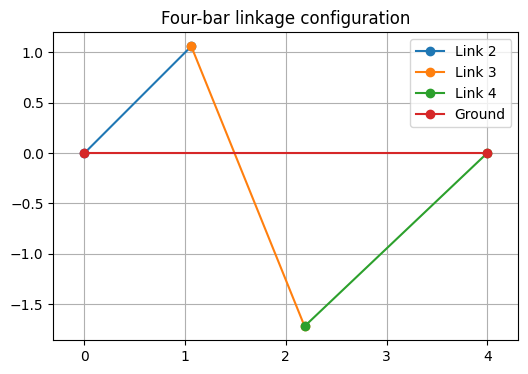

In [6]:
import matplotlib.pyplot as plt

# Joint coordinates
O2 = np.array([0, 0])
A = np.array([
    l2 * np.cos(theta2),
    l2 * np.sin(theta2)
])
B = np.array([
    A[0] + l3 * np.cos(theta3),
    A[1] + l3 * np.sin(theta3)
])
O4 = np.array([l1, 0])

# Plot links
plt.figure(figsize=(6, 4))

plt.plot([O2[0], A[0]], [O2[1], A[1]], 'o-', label='Link 2')
plt.plot([A[0], B[0]], [A[1], B[1]], 'o-', label='Link 3')
plt.plot([B[0], O4[0]], [B[1], O4[1]], 'o-', label='Link 4')
plt.plot([O2[0], O4[0]], [O2[1], O4[1]], 'o-', label='Ground')

plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Four-bar linkage configuration")
plt.show()


## Dynamic Simulation

The mechanism motion is simulated by varying the input angle
and solving the kinematic equations at each time step.


In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

theta2_vals = np.linspace(0.2, 2.5, 60)

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-1, l1 + l3 + 1)
ax.set_ylim(-l3 - 1, l3 + 1)
ax.set_aspect('equal')
ax.grid(True)

line2, = ax.plot([], [], 'o-', lw=2)
line3, = ax.plot([], [], 'o-', lw=2)
line4, = ax.plot([], [], 'o-', lw=2)
ground, = ax.plot([0, l1], [0, 0], 'o-', lw=2)

def update(theta2):
    global theta3, theta4

    theta3, theta4 = fsolve(
        loop_eq,
        [theta3, theta4],
        args=(l1, l2, l3, l4, theta2)
    )

    O2 = np.array([0, 0])
    A = np.array([l2*np.cos(theta2), l2*np.sin(theta2)])
    B = np.array([A[0] + l3*np.cos(theta3),
                  A[1] + l3*np.sin(theta3)])
    O4 = np.array([l1, 0])

    line2.set_data([O2[0], A[0]], [O2[1], A[1]])
    line3.set_data([A[0], B[0]], [A[1], B[1]])
    line4.set_data([B[0], O4[0]], [B[1], O4[1]])

    return line2, line3, line4

ani = FuncAnimation(
    fig,
    update,
    frames=theta2_vals,
    interval=100
)

HTML(ani.to_jshtml())


## Discussion and Extensions

This notebook demonstrates a model-based approach to problem solving.

Potential extensions include:
- Learning surrogate models using machine learning
- Sensitivity analysis of link parameters
- Extension to other planar mechanisms
